# Einführung in die Statistik mit Python - Tag 4

## Korrelation

### Pearson-Produkt Moment Korrelation

In [1]:
import math

def correlation(x, y):
  n = len(x)

  # Mittelwerte berechnen
  x_mn = sum(x) / n 
  y_mn = sum(y) / n

  # Varianzen berechnen
  var_x = (1 / (n-1)) * sum(map(lambda xi: (xi - x_mn) ** 2 , x))
  var_y = (1 / (n-1)) * sum(map(lambda yi: (yi - y_mn) ** 2 , y))

  # Standardabweichungen berechenen
  std_x, std_y = math.sqrt(var_x), math.sqrt(var_y)

  # Kovarianz berechnen
  xy_var = map(lambda xi, yi: (xi - x_mn) * (yi - y_mn), x, y)
  cov = (1 / (n-1)) * sum(xy_var)

  # Korrelationskoeffizient nach Pearson
  r = cov / (std_x * std_y)
  return float(f"{r:.3f}")

# Wohnungsgröße in Quadratmetern, Mietkosten
sqrm = [20, 30, 40, 50, 60]
cost = [300, 400, 600, 700, 1000]

print(correlation(sqrm, cost)) #out: 0.981

0.981


In [2]:
import pandas as pd

df = pd.DataFrame({"sqrm": sqrm, "cost": cost})
df.corr()

,sqrm,cost
sqrm,1.000000,0.981495
cost,0.981495,1.000000


In [3]:
import numpy
numpy.corrcoef(sqrm, cost)[0, 1]

0.9814954576223638

In [4]:
from scipy.stats.stats import pearsonr
import numpy as np

# another way to access the help of a certain function
# from pydoc import help
# help(pearsonr)

print(pearsonr(sqrm, cost))

(0.9814954576223638, 0.003013299071815991)


### Spearman Rank Korrelation

In [5]:
from collections import Counter

def ranking(array):
  counts = Counter(array)
  array_sorted = sorted(set(array))
  rank = 1
  rankings = {}
  for num in array_sorted:
    count = counts.get(num)
    if count == 1:
      rankings[num] = rank
      rank += 1
    else:
      rankings[num] = sum(range(rank, rank+count)) / count
      rank += count
  return [float(rankings.get(num)) for num in array]

# Beispiel für eine Rangkorrelation
eng = [12, 12, 3, 6, 10, 4, 15, 8]
deu = [14, 14, 5, 4, 11, 8, 10, 3]

eng_rank = ranking(eng) # [6.5, 6.5, 1.0, 3.0, 5.0, 2.0, 8.0, 4.0]
deu_rank = ranking(deu) # [7.5, 7.5, 3.0, 2.0, 6.0, 4.0, 5.0, 1.0]

correlation(eng_rank, deu_rank) #out: 0.639

0.639

In [6]:
### Spearman’s Correlations
import scipy.stats as stats
print(stats.spearmanr(eng,deu))

SpearmanrResult(correlation=0.6385542168674698, pvalue=0.08836256884491352)


## Lineare Regression

In [7]:
## First, we generate simulated data according to the model:
import pandas as pd
import numpy as np
x = np.linspace(-5, 5, 20)
np.random.seed(1)

# normal distributed noise
y = -5 + 3*x + 4 * np.random.normal(size=x.shape)

# Create a data frame containing all the relevant variables
data = pd.DataFrame({'x': x, 'y': y})

## Then we specify an OLS model and fit it:

from statsmodels.formula.api import ols
model = ols("y ~ x", data).fit()

## We can inspect the various statistics derived from the fit:

print(model.summary()) 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     74.03
Date:                Mon, 18 Nov 2019   Prob (F-statistic):           8.56e-08
Time:                        14:04:12   Log-Likelihood:                -57.988
No. Observations:                  20   AIC:                             120.0
Df Residuals:                      18   BIC:                             122.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.5335      1.036     -5.342      0.0

### Quadratic Polynomial

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as smf

''' Generate a noisy, slightly quadratic dataset '''
x = np.arange(100)
y = 150 + 3*x + 0.03*x**2 + 5*np.random.randn(len(x))

# Turn the data into a pandas DataFrame, so that we
# can address them in the formulas with their name
df = pd.DataFrame({'x':x, 'y':y})

# Fit the models, and show the results
Res1 = smf.ols('y~x', df).fit()
Res2 = smf.ols('y ~ x+I(x**2)', df).fit()
Res3 = smf.ols('y ~ x+I(x**2)+I(x**3)', df).fit()

### Modellkoeffizienten

In [9]:
print('The coefficients from the linear fit: {0}'.format(Res1.params))
print('The coefficients from the quadratic fit: {0}'.format(Res2.params))
print('The coefficients from the cubic fit: {0}'.format(Res3.params))

The coefficients from the linear fit: Intercept    102.078323
x              5.965156
dtype: float64
The coefficients from the quadratic fit: Intercept    149.285603
x              3.074914
I(x ** 2)      0.029194
dtype: float64
The coefficients from the cubic fit: Intercept    149.387903
x              3.062193
I(x ** 2)      0.029517
I(x ** 3)     -0.000002
dtype: float64


### Konfidenzintervall

In [10]:
Res1.conf_int()
# The confidence intervals are of particular interest, as parameters whose 
# confidence intervals overlap zero are not significant.

,0,1
Intercept,93.27071,110.885936
x,5.81145,6.118861


### Finde das Model mit dem "best-fit"

In [11]:
'''Solution with the tools from statsmodels'''
import statsmodels.api as sm

# Extract the AIC of all three Models
print("""The AIC-value is {0:4.1f} for the linear fit,\n 
      {1:4.1f} for the quadratic fit, and \n 
      {2:4.1f} for the cubic fit""".format(Res1.aic, Res2.aic, Res3.aic))

The AIC-value is 907.2 for the linear fit,
 
      570.8 for the quadratic fit, and 
 
      572.8 for the cubic fit


### Zusammenhänge mit Regplot und Jointplot darstellen

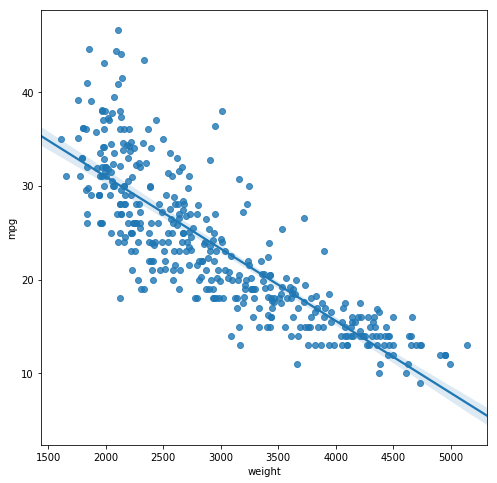

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Datensatz
cars = sns.load_dataset("mpg") 

# Figure und Axes Objekt anlegen
fig, ax = plt.subplots(figsize=(8, 8))

# Grafik anlegen
conf = {"x": "weight", "y": "mpg",
        "data": cars, "ax": ax}
sns.regplot(**conf)

# Grafik anzeigen
plt.show()

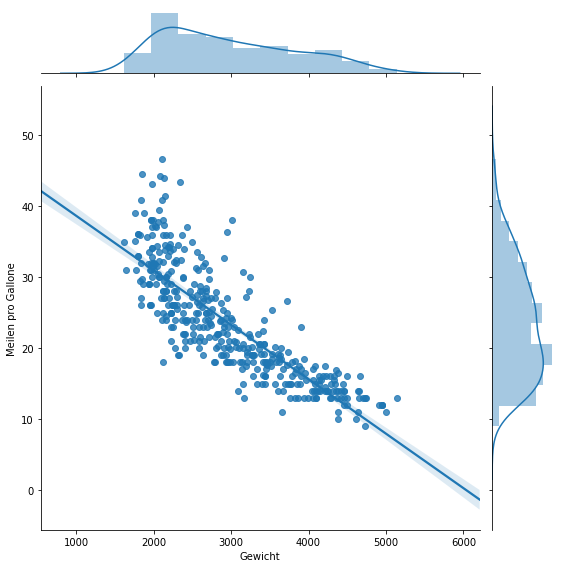

In [13]:
conf = {"x": "weight", "y": "mpg",
        "kind": "reg", "data": cars,
        "height": 8, "ratio": 6}
f = sns.jointplot(**conf)
f.set_axis_labels("Gewicht", 
                  "Meilen pro Gallone")

# Grafik anzeigen
plt.show()

## Übung

 Lade den Datensatz **schoko.csv** in Python

In [14]:
import pandas as pd
schoko = pd.read_csv("/home/matt/Documents/Github/pyStats/data/schoko.csv")

Erstelle eine Korrelation zwischen Kakaogehalt und Nussanteil (visuell und statistisch)

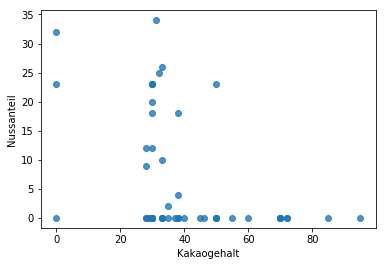

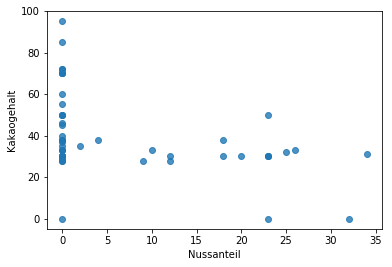

In [15]:
# library & dataset
import seaborn as sns
import matplotlib.pyplot as plt

# use the function regplot to make a scatterplot
sns.regplot(x=schoko["Kakaogehalt"], y=schoko["Nussanteil"], fit_reg=False)
plt.show()

sns.regplot(x=schoko["Nussanteil"], y=schoko["Kakaogehalt"], fit_reg=False)

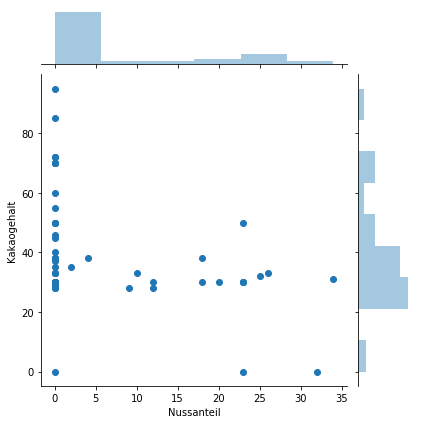

In [16]:
sns.jointplot(x=schoko["Nussanteil"], y=schoko["Kakaogehalt"])

In [17]:
import scipy.stats as stats

stats.spearmanr(schoko["Nussanteil"], schoko["Kakaogehalt"], nan_policy="omit")

SpearmanrResult(correlation=-0.40319136452035337, pvalue=0.0030396203105086104)

In [18]:
# Ohne drop NA
correlation(ranking(list(schoko["Nussanteil"])), ranking(list(schoko["Kakaogehalt"])))

###
# Nicht sinnvoll!!!
###

-0.439

In [19]:
#Oder 

# Need to run Sektion 1 & 5 to get Correlation & Ranking function

# Remove NAs
schoko_sub = schoko.dropna(subset=['Nussanteil', 'Kakaogehalt'])
#?schoko.dropna

# Run correlation
correlation(ranking(list(schoko_sub["Nussanteil"])), ranking(list(schoko_sub["Kakaogehalt"])))

-0.403

In [20]:
stats.pearsonr(schoko["Nussanteil"], schoko["Kakaogehalt"])
#?stats.pearsonr

(nan, 1.0)

Erklärt das Gewicht der Schokolade den Preis? Prüfe dies visuell und statistisch

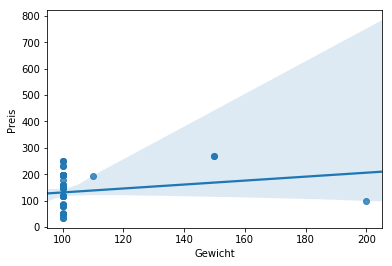

In [21]:
# use the function regplot to make a scatterplot
sns.regplot(x=schoko["Gewicht"], y=schoko["Preis"], fit_reg=True)
plt.show()

Erklärt der Kakaogehalt den Preis der Schokolade?

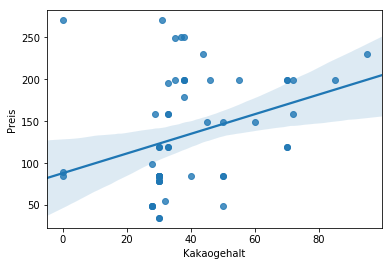

In [22]:
# use the function regplot to make a scatterplot
sns.regplot(x=schoko["Kakaogehalt"], y=schoko["Preis"], fit_reg=True)

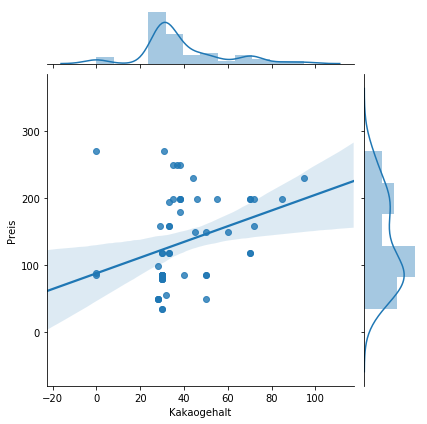

In [23]:
# use the function regplot to make a scatterplot
sns.jointplot(x=schoko["Kakaogehalt"], y=schoko["Preis"], kind="reg")

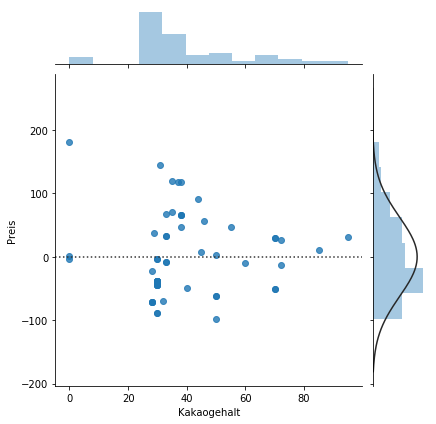

In [24]:
# Plot the residuals
sns.jointplot(x=schoko["Kakaogehalt"], y=schoko["Preis"], kind="resid")

In [25]:
import statsmodels.formula.api as smf

# Fit the models, and show the results
Res1 = smf.ols('Preis~Kakaogehalt', schoko).fit()
Res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Preis   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     6.626
Date:                Mon, 18 Nov 2019   Prob (F-statistic):             0.0127
Time:                        14:04:14   Log-Likelihood:                -327.69
No. Observations:                  59   AIC:                             659.4
Df Residuals:                      57   BIC:                             663.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      88.0130     19.553      4.501      0.000      48.859     127.167
Kakaogehalt     1.1707      0.455      2.574      0.013       0.260       2.081
==============================================================================
Omnibus:                        6.280   Durbin-Watson:                   0.624
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                5.923
Skew:                           0.775   Prob(JB):                       0.0518
Kurtosis:                       3.077   Cond. No.                         102.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Plotte ein quadratisches Polynom mit regplot()

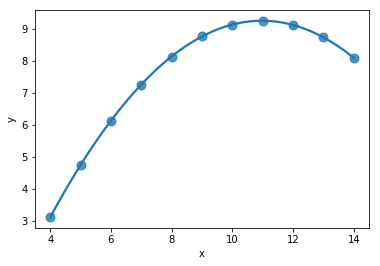

In [26]:
# Load the anscombe dataset
ans = sns.load_dataset("anscombe")

# Select the 2nd dataset
data = ans.loc[ans.dataset == "II"]

# Create a regplot with a quadratic polynomial by setting order=2
ax = sns.regplot(x="x", y="y", data=data,
                 scatter_kws={"s": 80},
                 order=2, ci=None, truncate=True)

Unterscheidet sich die Beziehung zwischen Kakaogehalt und Preis für Bio und Nicht-Bio Schokolade?

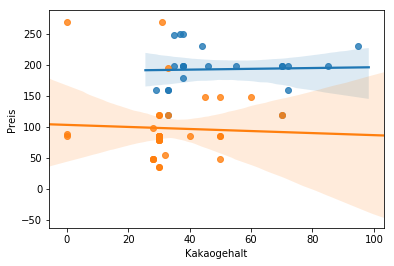

                            OLS Regression Results                            
Dep. Variable:                  Preis   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.049
Method:                 Least Squares   F-statistic:                   0.02396
Date:                Mon, 18 Nov 2019   Prob (F-statistic):              0.879
Time:                        14:04:14   Log-Likelihood:                -110.04
No. Observations:                  22   AIC:                             224.1
Df Residuals:                      20   BIC:                             226.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     190.0249     22.472      8.456      

In [27]:
import statsmodels.formula.api as smf

bio = schoko[schoko["Bio"] == "ja"]
non_bio = schoko[schoko["Bio"] == "nein"]

sns.regplot(bio.Kakaogehalt, bio.Preis)
sns.regplot(non_bio.Kakaogehalt, non_bio.Preis)
plt.show()

# Fit the models, and show the results
Res1 = smf.ols('Preis~Kakaogehalt', bio).fit()
print(Res1.summary())

Res2 = smf.ols('Preis~Kakaogehalt', non_bio).fit()
print(Res2.summary())

## Multivariate Datenanalyse

### Korrelation

Pairs plot

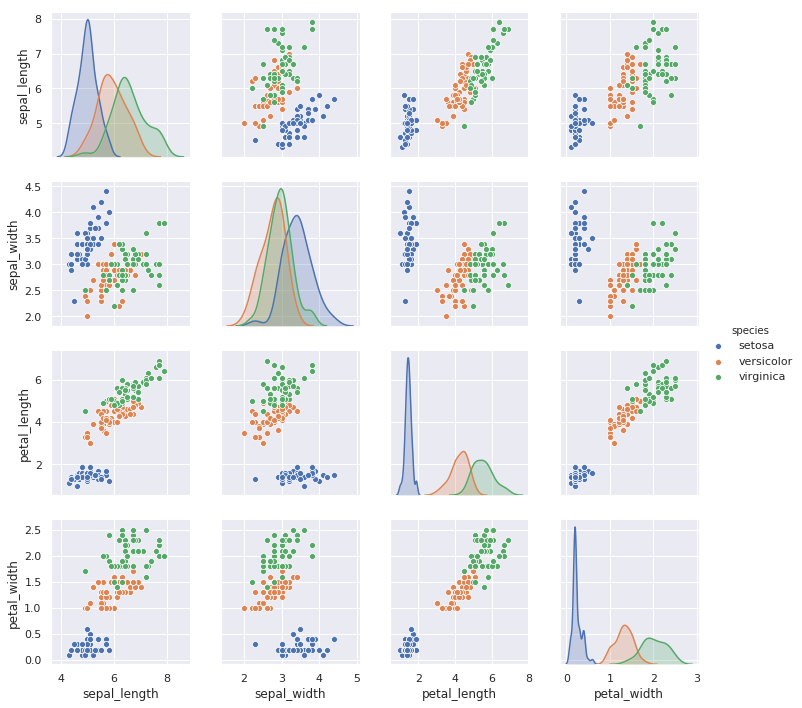

In [28]:
import seaborn as sns
sns.set()
df = sns.load_dataset("iris")
sns.pairplot(df, hue="species", height=2.5)

Korrelationsmatrix

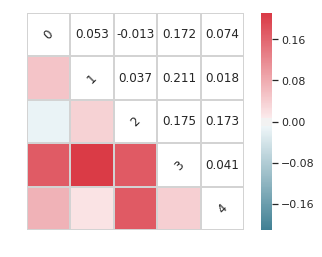

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

# Set seed for the random numbr generation
rs = np.random.RandomState(33)
# Create normally distribued dummy data, 
# simulating 100 recordings from 10 different variables
d = rs.normal(size=(100, 5))
d = pd.DataFrame(d)

# Compute the correlation matrix
corr = d.corr()
#print(corr)

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots()
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
vmax = np.abs(corr.values[~mask]).max()
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-vmax, vmax=vmax,
            square=True, linecolor="lightgray", linewidths=1, ax=ax)
for i in range(len(corr)):
    ax.text(i+0.5,(i+0.5), corr.columns[i], ha="center", va="center", rotation=45)
    for j in range(i+1, len(corr)):
        s = "{:.3f}".format(corr.values[i,j])
        ax.text(j+0.5,(i+0.5),s, 
            ha="center", va="center")
ax.axis("off")
plt.show()

### Multilineare Regression

In [30]:
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols

data = sns.load_dataset("iris")

model = ols('sepal_width ~ species + petal_length', data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            sepal_width   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     46.08
Date:                Mon, 18 Nov 2019   Prob (F-statistic):           5.14e-21
Time:                        14:04:16   Log-Likelihood:                -37.808
No. Observations:                 150   AIC:                             83.62
Df Residuals:                     146   BIC:                             95.66
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.99

#### Post-Hoc Analyse

In [31]:
print(model.f_test([0, 1, -1, 0]))

<F test: F=array([[3.26191465]]), p=0.07296614041660325, df_denom=146, df_num=1>


### Daten-Vorbereitung

z-Transformation

In [32]:
import math

def z_transform(array):
  n = len(array)
  mn = sum(array)/n
  var = (1/(n-1))*sum(map(lambda xi: (xi-mn)**2, array))
  std = math.sqrt(var)
  z = [(xi-mn)/std for xi in array]
  return z

pizza_de = [4.99, 7.99, 5.99, 4.99, 6.99]
pizza_us = [5.74, 9.19, 6.89, 5.74, 8.04]

z_de = z_transform(pizza_de)
z_us = z_transform(pizza_us)
print(z_de)
print(z_us)
z_de == z_us

[-0.9203579866168446, 1.3805369799252667, -0.15339299776947424, -0.9203579866168446, 0.6135719910778962]
[-0.9203579866168446, 1.3805369799252667, -0.1533929977694744, -0.9203579866168446, 0.6135719910778958]


False

### Cluster-Analyse

Euclidean Distance

In [33]:
### Euclidean distance matrix

# Import libraries
import scipy.spatial.distance as sp

# Filtering survey data
data = data[["sepal_length", "sepal_width", "petal_length", "petal_width"]]

# Calculate distance
dist = sp.pdist(data, 'euclidean')

# Turn into DataFrame
df_dist = pd.DataFrame(sp.squareform(dist))

# Print head
print(df_dist.head())

        0         1         2         3         4         5         6    \
0  0.000000  0.538516  0.509902  0.648074  0.141421  0.616441  0.519615   
1  0.538516  0.000000  0.300000  0.331662  0.608276  1.090871  0.509902   
2  0.509902  0.300000  0.000000  0.244949  0.509902  1.086278  0.264575   
3  0.648074  0.331662  0.244949  0.000000  0.648074  1.166190  0.331662   
4  0.141421  0.608276  0.509902  0.648074  0.000000  0.616441  0.458258   

        7         8         9    ...       140       141       142       143  \
0  0.173205  0.921954  0.469042  ...  5.019960  4.636809  4.208325  5.257376   
1  0.424264  0.509902  0.173205  ...  5.072475  4.702127  4.180909  5.320714   
2  0.412311  0.435890  0.316228  ...  5.228767  4.868265  4.334743  5.475400   
3  0.500000  0.300000  0.316228  ...  5.104900  4.760252  4.177320  5.349766   
4  0.223607  0.921954  0.529150  ...  5.061620  4.686150  4.246175  5.297169   

        144       145       146       147       148       149  
0  5

Jaccard similarity

In [34]:
# Calculate Jaccard similarity

dist = sp.pdist(data, 'jaccard')
df_dist = pd.DataFrame(sp.squareform(dist))
print(df_dist.head())

    0     1     2     3     4    5     6     7     8     9    ...   140   141  \
0  0.00  0.50  0.75  0.75  0.50  1.0  0.75  0.75  0.50  1.00  ...  1.00  1.00   
1  0.50  0.00  0.75  0.75  0.50  1.0  0.75  0.75  0.50  0.75  ...  1.00  1.00   
2  0.75  0.75  0.00  0.75  0.75  1.0  1.00  0.75  0.75  1.00  ...  1.00  1.00   
3  0.75  0.75  0.75  0.00  0.75  1.0  0.75  0.50  0.75  0.50  ...  0.75  0.75   
4  0.50  0.50  0.75  0.75  0.00  1.0  0.75  0.50  0.50  1.00  ...  1.00  1.00   

   142   143  144   145  146   147  148   149  
0  1.0  1.00  1.0  1.00  1.0  1.00  1.0  1.00  
1  1.0  1.00  1.0  0.75  1.0  0.75  1.0  0.75  
2  1.0  0.75  1.0  1.00  1.0  1.00  1.0  1.00  
3  1.0  1.00  1.0  1.00  1.0  1.00  1.0  1.00  
4  1.0  1.00  1.0  1.00  1.0  1.00  1.0  1.00  

[5 rows x 150 columns]


Hierarchical clustering

In [35]:
### Hierarchical clustering
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

Z_single = linkage(data, 'single') # Single linkage

Z_complete = linkage(data, 'complete') # Complete linkage

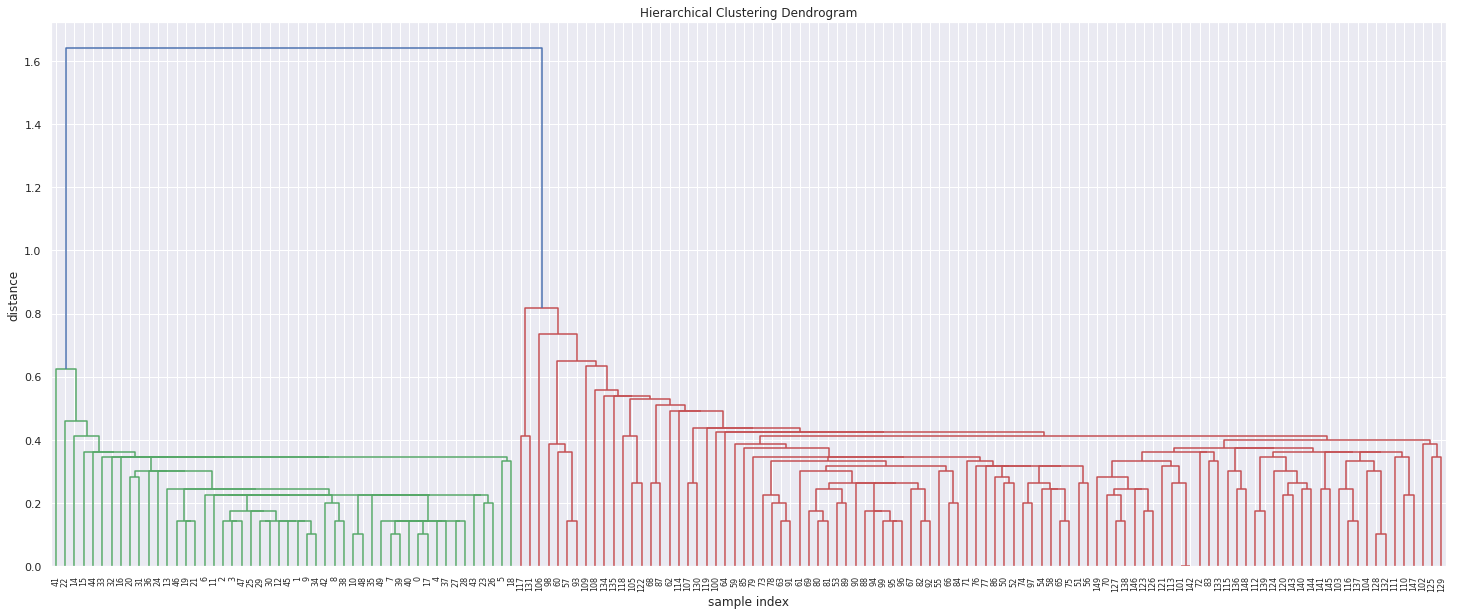

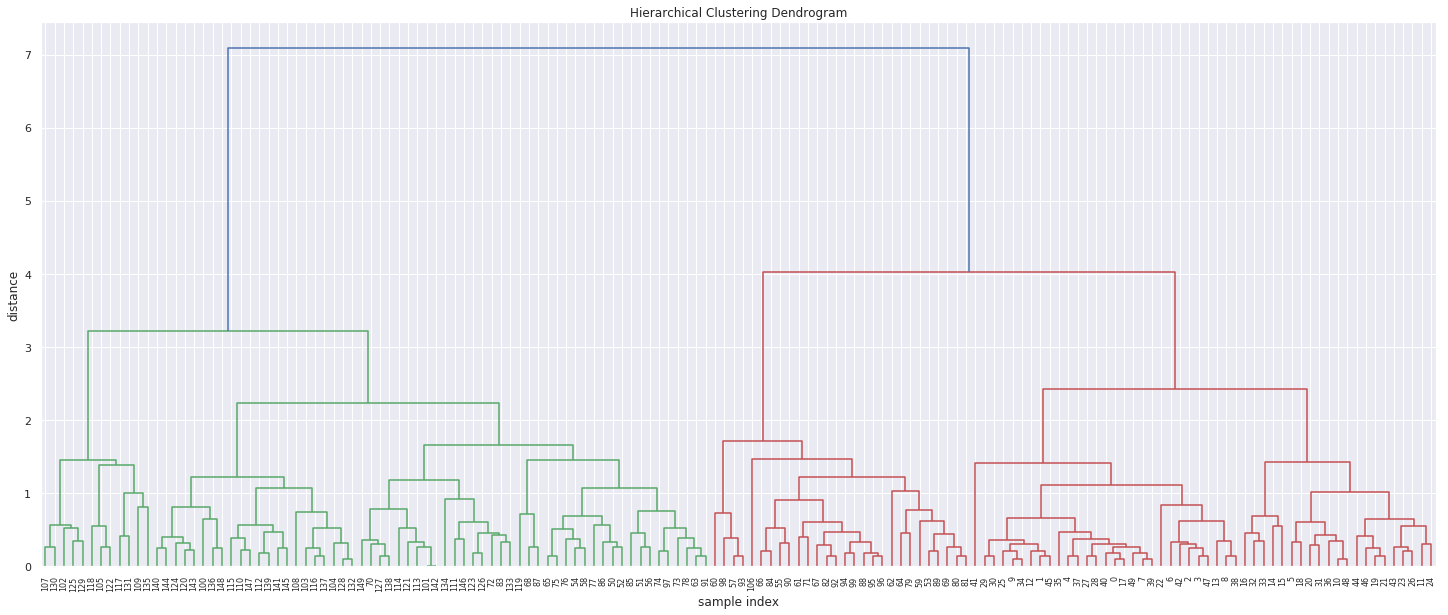

In [36]:
# Single-linkage clustering (method= “single”)

# Calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(Z_single,
           leaf_rotation=90., # rotates the x axis labels
           leaf_font_size=8., # font size for the x axis labels
)
plt.show()

# Complete-linkage clustering (method= “complete”)
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(Z_complete,
           leaf_rotation=90., # rotates the x axis labels
           leaf_font_size=8., # font size for the x axis labels
)
plt.show()

Non-hierarchical clustering

[[6.06566359 7.89114515 0.83096318 0.32381517]
 [7.06884701 6.16187415 2.51302623 1.88986207]
 [8.24767664 7.18318546 3.13897608 2.60871056]]


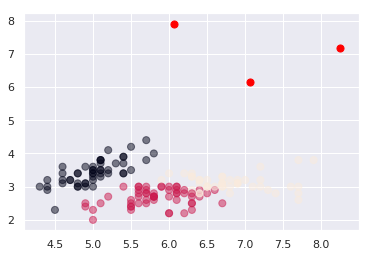

In [37]:
### Clustering with k-means

# Import modules
from scipy.cluster.vq import whiten
from sklearn.cluster import KMeans

# Normalize variables values
std_survey_data = whiten(data, check_finite=True)

# K-means cluster analysis
kmeans = KMeans(n_clusters=3).fit(std_survey_data)
centroids = kmeans.cluster_centers_
print(centroids)

# Plot data coloured by Clusters
plt.scatter(data['sepal_length'], data['sepal_width'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)

## Übung II

Ladet den Datensatz **schoko.csv** in Python

In [38]:
import pandas as pd
schoko = pd.read_csv("/home/matt/Documents/Github/pyStats/data/schoko.csv")

Erstelle einen pairplot() für Preis, Kakaogehalt und Anzahl der Inhaltsstoffe und zusätzlich "Bio" oder "Kategorie" als Farbton (hue)

/home/matt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/matt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


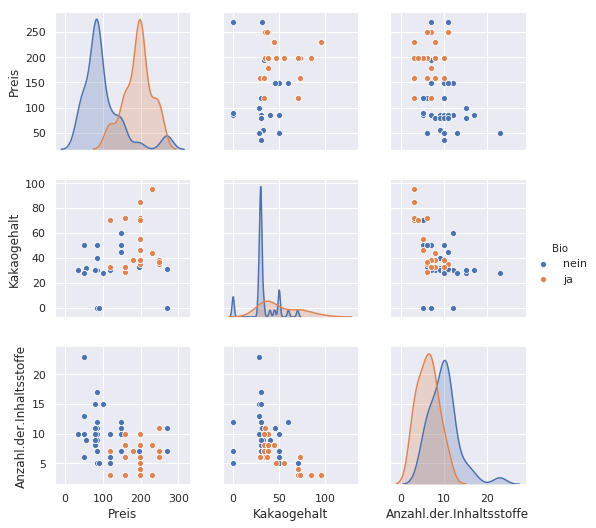

In [39]:
import seaborn as sns
sns.pairplot(schoko, vars=["Preis", "Kakaogehalt", "Anzahl.der.Inhaltsstoffe"], hue="Bio")

/home/matt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/matt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


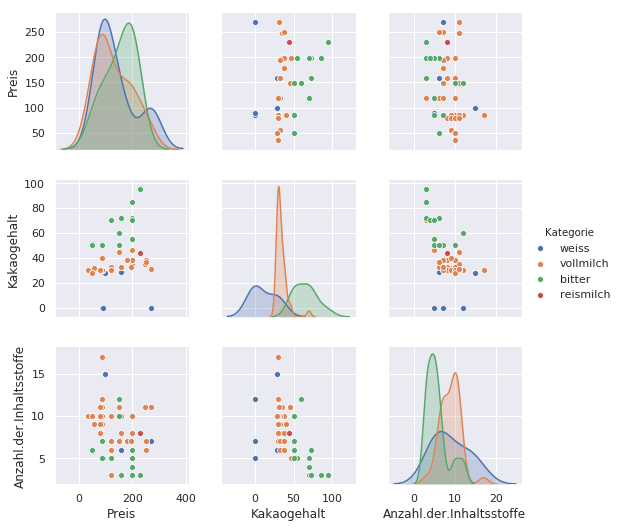

In [40]:
import seaborn as sns
sns.pairplot(schoko, vars=["Preis", "Kakaogehalt", "Anzahl.der.Inhaltsstoffe"], hue="Kategorie")

Erstelle eine Korrelationsmatrix für alle Variablen

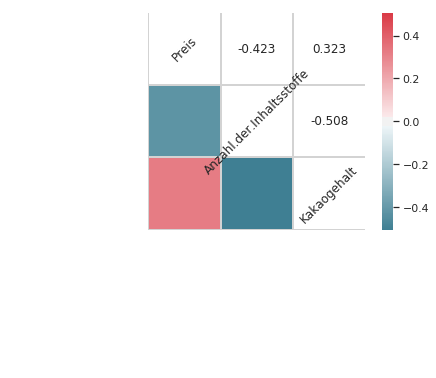

In [41]:
# Compute the correlation matrix
import numpy as np
from matplotlib import pyplot as plt

schoko_sub = schoko[["Preis", "Kategorie", "Bio", "Anzahl.der.Inhaltsstoffe", "Kakaogehalt"]]

corr = schoko_sub.corr()
#print(corr)

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots()
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
vmax = np.abs(corr.values[~mask]).max()
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-vmax, vmax=vmax,
            square=True, linecolor="lightgray", linewidths=1, ax=ax)
for i in range(len(corr)):
    ax.text(i+0.5,(i+0.5), corr.columns[i], ha="center", va="center", rotation=45)
    for j in range(i+1, len(corr)):
        s = "{:.3f}".format(corr.values[i,j])
        ax.text(j+0.5,(i+0.5),s, 
            ha="center", va="center")
ax.axis("off")
plt.show()

Erstelle eine multilineare Regression für Kakaogehalt, Anzahl der Inhaltsstoffe und Preis und plottet diesen Zusammenhang in 3D

In [42]:
# OLS cannot deal with "Anzahl.der.Inhaltsstoffe", thus we have to rename the column
schoko["Anzahl_Inhaltsstoffe"] = schoko["Anzahl.der.Inhaltsstoffe"]

model = ols('Preis ~ Kakaogehalt + Anzahl_Inhaltsstoffe', schoko).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Preis   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     6.749
Date:                Mon, 18 Nov 2019   Prob (F-statistic):            0.00237
Time:                        14:04:21   Log-Likelihood:                -324.56
No. Observations:                  59   AIC:                             655.1
Df Residuals:                      56   BIC:                             661.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              168.0088 

/home/matt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  
/home/matt/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
No handles with labels found to put in legend.


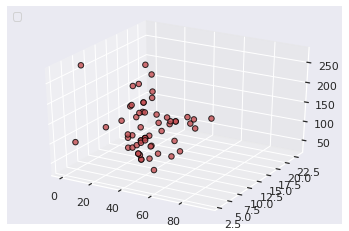

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

# Create plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax = fig.gca(projection='3d')

ax.scatter(schoko["Kakaogehalt"], schoko["Anzahl_Inhaltsstoffe"], schoko["Preis"], 
           alpha=0.8, c="r", marker="o", edgecolors='none', s=30)
plt.legend(loc=2)
plt.show()

Erstelle eine hierarchische Cluster-Analyse für jede Schokoladen-Tafel

In [44]:
# Move me column to index
#schoko.set_index("me", inplace=True)
schoko.head()

,me,Marke,Einkaufsort,Preis,Kategorie,Bio,Fair,crisp,nuss,traube,...,chili,echte.vanille,cocos,Kakaogehalt,Gewicht,Anzahl.der.Inhaltsstoffe,Nussanteil,Crisps,Verfallsdatum,Anzahl_Inhaltsstoffe
0,Choceur Weisse Crisp,Choceur,Aldi,99,weiss,nein,nein,1,0,0,...,0,0,0,28.0,200,15,12.0,6,5.0,15
1,Choceur Alpenvollmilch,Choceur,Aldi,35,vollmilch,nein,nein,0,0,0,...,0,0,0,30.0,100,10,0.0,0,9.0,10
2,Choceur Haselnuss,Choceur,Aldi,35,vollmilch,nein,nein,0,1,0,...,0,0,0,30.0,100,10,12.0,0,9.0,10
3,Nusskcker,Nusskcker,Aldi,55,vollmilch,nein,nein,0,1,0,...,0,0,0,32.0,100,9,25.0,0,6.0,9
4,Happy Halloween,Meybo,Bio Bio,199,vollmilch,ja,nein,0,0,0,...,0,1,0,35.0,100,6,0.0,0,15.0,6


In [45]:
### Hierarchical clustering
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

schoko_sub = schoko[["crisp", "nuss", "traube", "rum", "chili", "echte.vanille", "cocos", "Kakaogehalt", "Anzahl.der.Inhaltsstoffe", "Nussanteil", "Crisps"]]

Z_single = linkage(schoko_sub, 'single', metric="jaccard") # Single linkage
#Z_single = linkage(schoko, 'single', metric="cosine") # Single linkage

#?linkage
#?pdist

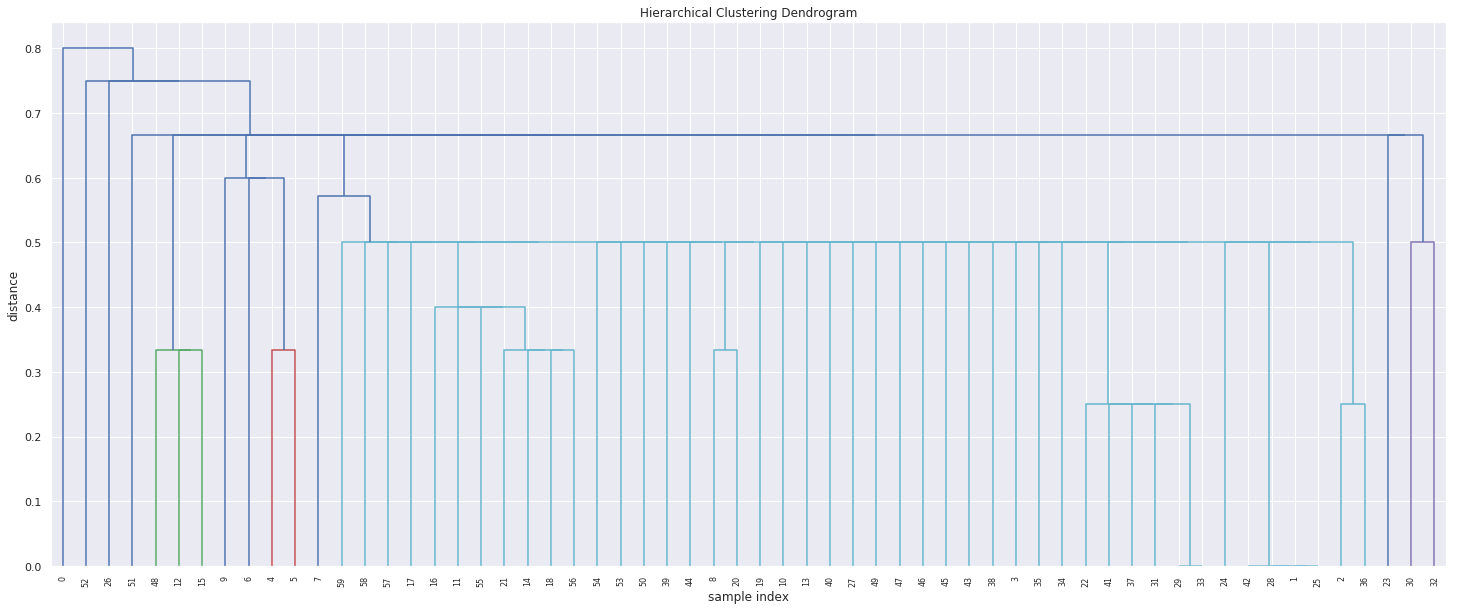

In [46]:
# Calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(Z_single,
           leaf_rotation=90., # rotates the x axis labels
           leaf_font_size=8., # font size for the x axis labels
          
)
plt.show()

Erstelle eine nicht-hierarchische Cluster-Analyse für den Schoko Datensatz

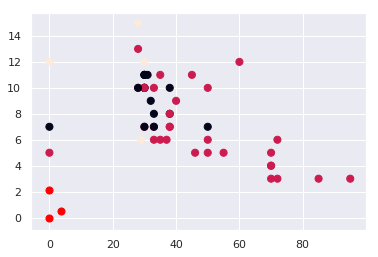

In [47]:
### Clustering with k-means

# Import modules
from scipy.cluster.vq import whiten
from sklearn.cluster import KMeans

# Normalize variables values
schoko_sub = schoko_sub.dropna()
std_survey_data = whiten(schoko_sub, check_finite=True)

# K-means cluster analysis
kmeans = KMeans(n_clusters=3).fit(std_survey_data)
centroids = kmeans.cluster_centers_
#print(centroids)
schoko_sub.head()

# Plot data coloured by Clusters
plt.scatter(schoko_sub['Kakaogehalt'], schoko_sub['Anzahl.der.Inhaltsstoffe'], 
            c= kmeans.labels_.astype(float), s=50)#, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)